In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Harshad\Desktop\CodeSoft\IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Checking null values

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.shape

(150, 5)

# DATA PREPROCESSING

In [7]:
df['iris_code'] = df['species'].map({'Iris-setosa':0 ,'Iris-versicolor':1,'Iris-virginica':2}).astype(int)

In [8]:
iris0 = df[df.iris_code ==0] #-setosa
iris1 = df[df.iris_code ==1] #-versicolor
iris2 = df[df.iris_code ==2] #-Virgiinica

# VISUALIZATION

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

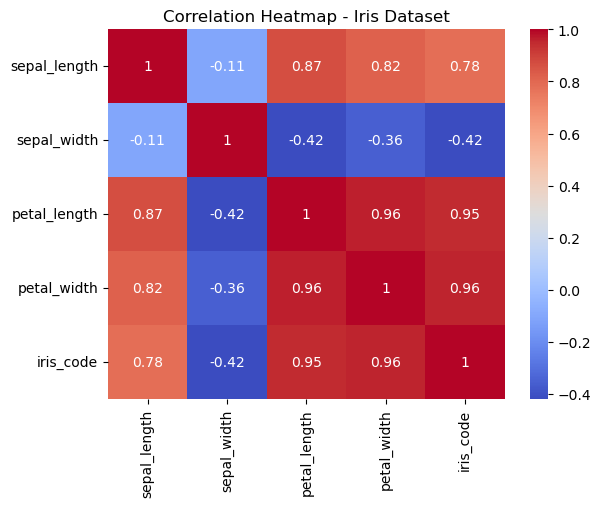

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Iris Dataset")
plt.show()

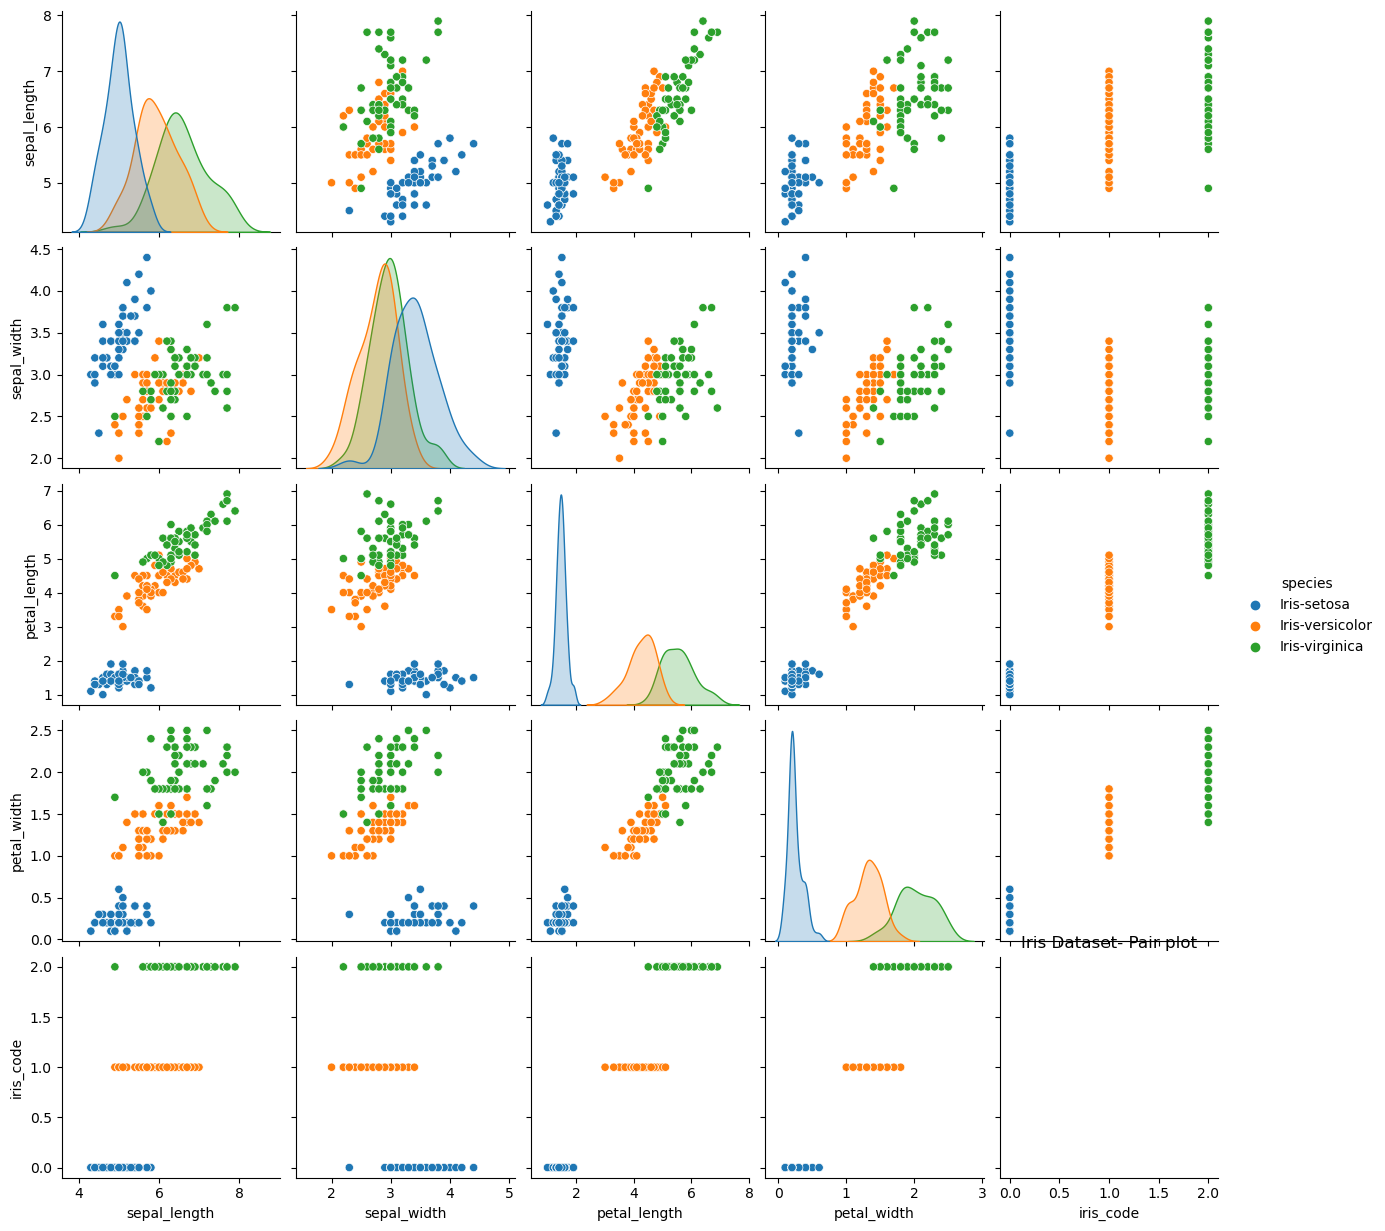

In [11]:
sns.pairplot(df,hue="species")
plt.title("Iris Dataset- Pair plot")
plt.show()

Text(0.5, 1.0, 'Scatter plot - Comparision of sepal length and sepal width')

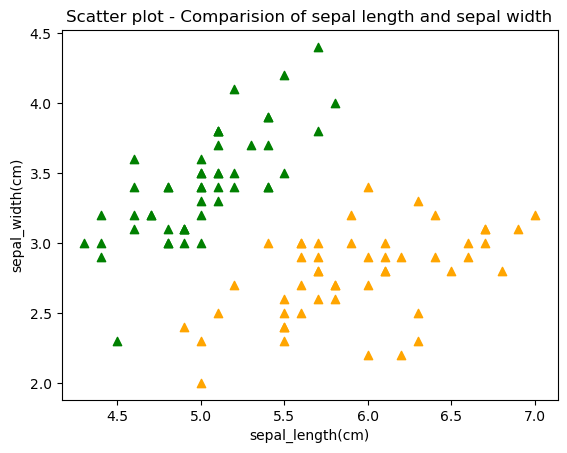

In [12]:
plt.scatter(iris0['sepal_length'],iris0['sepal_width'],color='green',marker='^')
plt.scatter(iris1['sepal_length'],iris1['sepal_width'],color='orange',marker='^')
plt.xlabel('sepal_length(cm)')
plt.ylabel('sepal_width(cm)')
plt.title("Scatter plot - Comparision of sepal length and sepal width")

Text(0.5, 1.0, 'Scatter plot - Comparision of petal length and petal width')

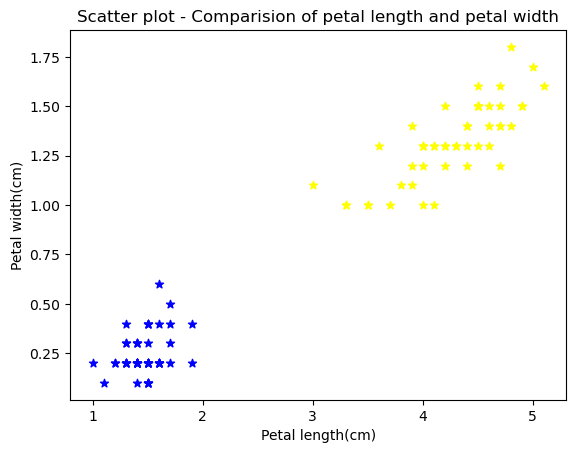

In [13]:
plt.scatter(iris0['petal_length'],iris0['petal_width'],color='blue',marker='*')
plt.scatter(iris1['petal_length'],iris1['petal_width'],color='Yellow',marker='*')
plt.xlabel('Petal length(cm)')
plt.ylabel('Petal width(cm)')
plt.title("Scatter plot - Comparision of petal length and petal width")

In [14]:
#Split the dataseet into features x and target y
x = df.drop(["species","iris_code"],axis=1)
y = df.iris_code

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.svm import SVC
model=SVC()

In [17]:
model.fit(x_train,y_train)

SVC()

In [18]:
model.score(x_test,y_test)

0.8666666666666667

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [20]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy:',accuracy)
report=classification_report(y_test,y_pred)
print('classification_report:')
print(report)

accuracy: 0.8666666666666667
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.82      0.82      0.82        11
           2       0.80      0.80      0.80        10

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



In [31]:
new_data = np.array([[2, 0.4, 5, 2], [3, 4.8, 3.8, 1.5], [6.5, 7.2, 6, 4]])
predicted_labels = model.predict(new_data)
print("Predicted labels for new data:")
print(predicted_labels)

Predicted labels for new data:
[2 1 2]
